In [1]:
import pandas as pd
import os
import glob
import chardet
import numpy as np
import math
# coding=utf-8

#查詢目錄位置
print( os.getcwd()  )

Folder_Path = r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data\OK'   #要拼接的文件夾及其完整路徑，注意不要包含中文
SaveFile_Path = r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data'    #拼接後要保存的文件路徑
SaveFile_Name = r'all_0720.csv'                                        #合並後要保存的文件名
 

C:\Users\bwich\Google_Cloud\AIA_Project-VAS


In [2]:
# 判斷編碼型態

def find_encoding(fname):
    r_file = open(fname, 'rb').read() # 'b', meaning 'binary'.
    result = chardet.detect(r_file) # chardet.detect() 函式就可以偵測字串「最有可能」的編碼
    charenc = result['encoding'] #識別編碼
    return charenc

In [3]:
# 資料清理，增加資料
def data_Cleaning(dfname,filename):
    filename= file_list[0]  #取檔名

    dfname.insert(1,'filename' ,filename ) #插入檔名
    #dfname[np.isnan(dfname['Vacuum Data_VG001_Exponent'])]=0
    
    # Vacuum Align System (真空貼合系統)
    # 換算壓力值公式 : log10(Mantissa*10^Exponent)，總共7組 gauge pressure sensor ( Mantissa(尾數) ; Exponent(指數))
    dfname.insert(2,'VG001' ,np.log10(dfname['Vacuum Data_VG001_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG001_Exponent']) )  )  ))   #插入VG001
    dfname.insert(3,'VG002' ,np.log10(dfname['Vacuum Data_VG002_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG002_Exponent']) )  )  ))   #插入VG002
    dfname.insert(4,'VG003' ,np.log10(dfname['Vacuum Data_VG003_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG003_Exponent']) )  )  ))   #插入VG003    
    dfname.insert(5,'VG111' ,np.log10(dfname['Vacuum Data_VG111_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG111_Exponent']) )  )  ))   #插入VG111        
    dfname.insert(6,'VG921' ,np.log10(dfname['Vacuum Data_VG921_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG921_Exponent']) )  )  ))   #插入VG921        
    dfname.insert(7,'VG922' ,np.log10(dfname['Vacuum Data_VG922_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG923_Exponent']) )  )  ))   #插入VG922        
    dfname.insert(8,'VG923' ,np.log10(dfname['Vacuum Data_VG923_Mantissa']*(np.power(10.,(dfname['Vacuum Data_VG922_Exponent']) )  )  ))   #插入VG923        
    
    #取代上午/下午
      # df.loc[df.First_name != 'Bill', 'name_match'] = 'Mis-Match'  
    dfname.loc[dfname.DateTime.str.contains("上午") , 'DateTime24'] =  dfname.DateTime.str.replace('上午','') +"AM" 
    dfname.loc[dfname.DateTime.str.contains("下午") , 'DateTime24'] =  dfname.DateTime.str.replace('下午','') +"PM"        

    #轉換 DateTime 24小時制
    dfname.DateTime24 = pd.to_datetime( dfname.DateTime24 ).dt.strftime('%Y-%m-%d %H:%M:%S')
    
     # 移動排序 DateTime24
    cols = list(dfname)
    cols.insert(0,cols.pop(cols.index('DateTime24')))
    dfname = dfname.loc[:,cols]

   # dfname['new_DateTime']=dfname.new_DateTime(1)

    # Row 排序
    #dfname.sort(['DateTime'], ascending=[1])
    dfname.sort_values(by=['filename', 'DateTime24'] )  
    
    #  刪除重複row    
    dfname.drop_duplicates( ['filename', 'DateTime24' ] , keep = 'first' ,inplace=True)   
    
    # 插入rownum
    dfname.insert(1,'rownum' , np.arange(len(dfname)) ) 
    
    return dfname


In [4]:
#修改當前工作目錄
os.chdir(Folder_Path)
#將該文件夾下的所有文件名存入一個列表
file_list = os.listdir()
 
#讀取第一個CSV文件並包含表頭
my_encoding = find_encoding(Folder_Path +'\\'+ file_list[0])
df = pd.read_csv(Folder_Path +'\\'+ file_list[0], encoding=my_encoding)   #編碼默認UTF-8，若亂碼自行更改

#將讀取的第一個CSV文件寫入合並後的文件保存
dfClean=data_Cleaning(df,file_list[0])
dfClean.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8",index=False)  # 儲存 Column Name
    
#循環遍歷列表中各個CSV文件名，並追加到合並後的文件
for i in range(1,len(file_list)):
    # 讀檔
    df = pd.read_csv(Folder_Path + '\\'+ file_list[i], encoding=my_encoding)  
    
    # 清洗資料
    dfClean=data_Cleaning(df,file_list[i])
        
   
    # Save All
    dfClean.to_csv(SaveFile_Path+'\\'+ SaveFile_Name,encoding="utf_8",index=False, header=False, mode='a+')  # header=False (不儲存Column Name)

In [5]:
#dfClean

In [6]:
# load the data using pandas build in read csv function
#df_city_time_series = pd.read_csv('../input/City_time_series.csv',parse_dates=['Date'])
df_city_time_series = dfClean 
# drop null values in ZHVIPerSqft_AllHomes because we are interested in this column
df_city_time_series = df_city_time_series.dropna(subset=['VG001'])
# print the head of our data set
df_city_time_series.head()

,DateTime24,rownum,DateTime,filename,VG001,VG002,VG003,VG111,VG921,VG922,...,上Pin吸着圧力1/3_PS421,上Pin吸着圧力1/2_PS422,上Pin吸着圧力2/3_PS423,上Pin吸着圧力1/1_PS424,下Pin吸着圧力1/3_PS321,下Pin吸着圧力2/3_PS322,下Pin吸着圧力1/1_PS323,Diaphragm 中央圧力値_PS123,Diaphragm 外周圧力値_PS126,Diaphragm 外周圧力値_PS127
0,2019-06-21 20:07:12,0,2019/6/21 下午 08:07:12,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.68842,-3.943095,4.820858,4.553883,1.164353,1.903633,...,-65.1,-76.1,-71.0,-63.7,4.9,4.1,1.6,-97.3,-98.0,-99.2
6,2019-06-21 20:07:13,1,2019/6/21 下午 08:07:13,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.68842,-3.946922,4.822168,4.553883,1.164353,1.149219,...,-81.9,-88.8,-86.8,-79.6,4.5,3.6,1.1,-97.5,-97.7,-98.8
13,2019-06-21 20:07:14,2,2019/6/21 下午 08:07:14,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.68842,-3.950782,4.822168,4.553883,1.164353,1.866878,...,-88.8,-92.7,-91.4,-86.7,4.4,3.6,1.1,-97.3,-97.5,-98.9
20,2019-06-21 20:07:15,3,2019/6/21 下午 08:07:15,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.68842,-3.950782,4.823474,4.553883,1.164353,1.495544,...,-88.9,-92.9,-91.6,-87.2,4.6,3.8,1.3,-97.6,-97.9,-99.1
26,2019-06-21 20:07:16,4,2019/6/21 下午 08:07:16,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.68842,-3.954677,4.824126,4.555094,1.164353,1.367356,...,-89.1,-92.8,-91.5,-87.4,4.8,4.0,1.5,-97.7,-97.9,-99.1


In [7]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data\all_0720.csv', parse_dates=['rownum'], index_col='rownum')
#df=dfClean
# Draw Plot
def plot_df(df, x, y, title="", xlabel='rownum', ylabel='VG001', dpi=1500):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.VG001, title='VAS Serial.')    

<Figure size 24000x7500 with 1 Axes>

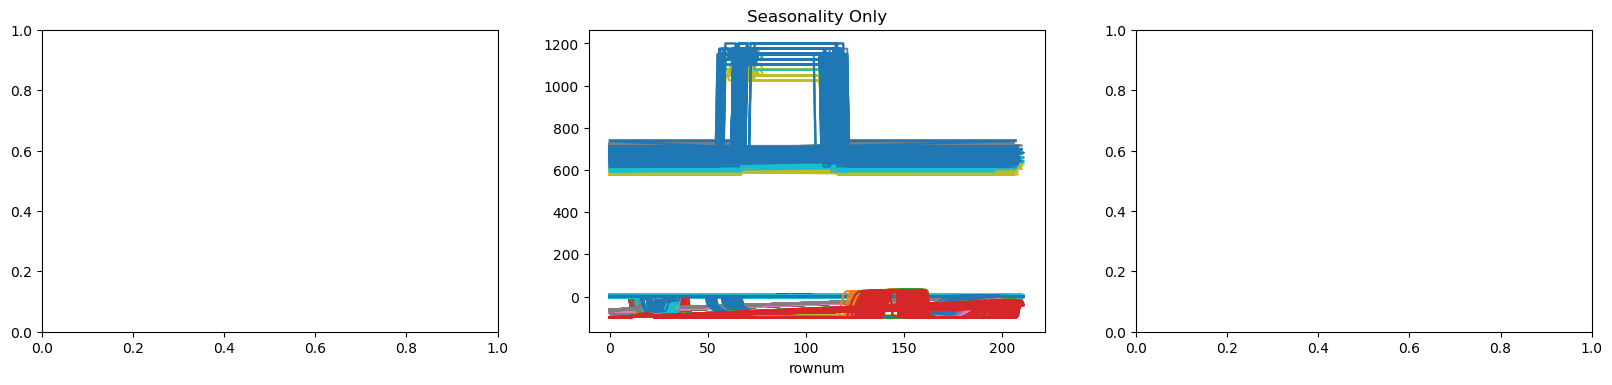

In [8]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
#pd.read_csv(r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data\all_0720.csv', parse_dates=['rownum'], index_col='rownum').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv(r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data\all_0720.csv', parse_dates=['rownum'], index_col='rownum').plot(title='Seasonality Only', legend=False, ax=axes[1])

#pd.read_csv(r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data\all_0720.csv', parse_dates=['rownum'], index_col='rownum').plot(title='Trend and Seasonality', legend=False, ax=axes

raw_data

In [16]:
import pandas as pd
import numpy as np
from sklearn import svm
cc =  pd.read_csv(r'C:\Users\bwich\Google_Cloud\AIA_Project-VAS\Data\all_0720.csv', parse_dates=['rownum'], index_col='rownum')

In [26]:
# Data check. 

cc.head()
cc.describe()

,VG001,VG002,VG003,VG111,VG921,VG922,VG923,Camera#1_AutoFocus値,Camera#2_AutoFocus値,Camera#3_AutoFocus値,...,上Pin吸着圧力1/2_PS422,上Pin吸着圧力2/3_PS423,上Pin吸着圧力1/1_PS424,下Pin吸着圧力1/3_PS321,下Pin吸着圧力2/3_PS322,下Pin吸着圧力1/1_PS323,Diaphragm 中央圧力値_PS123,Diaphragm 外周圧力値_PS126,Diaphragm 外周圧力値_PS127,Category
count,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,...,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.000000,57134.0
mean,2.852135,-2.940449,2.664361,3.107645,1.648532,1.474093,1.905477,789.913677,731.305475,775.249711,...,-60.082713,-59.964893,-57.506999,-51.541016,-52.971530,-52.830810,-80.014203,-83.388266,-84.542497,0.0
std,2.211353,1.535196,2.459900,1.716529,0.806978,0.280020,0.896361,201.540617,192.957829,204.413204,...,43.916442,43.799776,44.047456,44.356898,44.554844,44.231488,41.136259,37.330224,37.185285,0.0
min,-0.521434,-4.598599,-1.428291,0.488551,1.107210,1.000000,1.000000,622.000000,577.000000,593.000000,...,-96.600000,-96.600000,-95.800000,-93.200000,-94.100000,-95.800000,-98.000000,-98.500000,-99.800000,0.0
25%,0.029384,-4.062482,-0.119044,0.986772,1.164353,1.382017,1.103804,664.000000,617.000000,646.000000,...,-95.900000,-95.800000,-95.000000,-92.500000,-93.400000,-95.200000,-97.500000,-97.900000,-99.100000,0.0
50%,4.336460,-3.728158,4.294466,4.217484,1.276462,1.387390,1.640481,687.000000,631.000000,670.000000,...,-92.700000,-91.500000,-87.100000,-77.700000,-80.600000,-73.150000,-97.300000,-97.700000,-98.900000,0.0
75%,4.819544,-1.269218,4.824776,4.563481,1.704151,1.448706,2.089905,728.000000,672.000000,712.000000,...,0.800000,1.100000,2.000000,4.600000,3.800000,1.300000,-96.500000,-97.300000,-98.500000,0.0
max,5.000000,1.571709,5.000000,4.804821,4.988113,2.784617,5.445604,1200.000000,1125.000000,1175.000000,...,5.000000,5.300000,6.200000,8.800000,8.000000,5.600000,32.200000,31.700000,30.100000,0.0


In [19]:
#I observed an conflict in the name 'class'. Therefore, I have changed the name from class to category

#cc= cc.rename(columns={'Class': 'Category'})
cc["Category"]=0

,DateTime24,DateTime,filename,VG001,VG002,VG003,VG111,VG921,VG922,VG923,...,上Pin吸着圧力1/2_PS422,上Pin吸着圧力2/3_PS423,上Pin吸着圧力1/1_PS424,下Pin吸着圧力1/3_PS321,下Pin吸着圧力2/3_PS322,下Pin吸着圧力1/1_PS323,Diaphragm 中央圧力値_PS123,Diaphragm 外周圧力値_PS126,Diaphragm 外周圧力値_PS127,Category
rownum,,,,,,,,,,,,,,,,,,,,,
0,2019-06-22 05:30:36,2019/6/22 上午 05:30:36,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.060481,4.843233,4.561101,1.161368,1.967080,2.086360,...,-73.3,-68.4,-61.6,4.7,4.0,1.5,-97.2,-97.6,-99.0,0
1,2019-06-22 05:30:37,2019/6/22 上午 05:30:37,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.060481,4.843233,4.561101,1.161368,1.967080,2.086360,...,-77.3,-72.9,-65.2,4.7,3.9,1.4,-97.2,-97.7,-99.1,0
2,2019-06-22 05:30:38,2019/6/22 上午 05:30:38,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.062482,4.844477,4.561101,1.161368,1.149219,3.086360,...,-89.4,-87.5,-81.1,4.6,3.9,1.5,-97.5,-97.7,-98.9,0
3,2019-06-22 05:30:39,2019/6/22 上午 05:30:39,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.064493,4.845098,4.562293,1.161368,1.835056,2.086360,...,-92.6,-91.3,-86.7,4.8,3.8,1.5,-97.4,-98.0,-98.8,0
4,2019-06-22 05:30:40,2019/6/22 上午 05:30:40,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.067019,4.844477,4.562293,1.161368,1.466868,2.086360,...,-92.8,-91.6,-87.4,4.8,4.0,1.4,-97.7,-98.3,-99.1,0
5,2019-06-22 05:30:41,2019/6/22 上午 05:30:41,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.069051,4.845098,4.562293,1.161368,1.357935,2.086360,...,-93.1,-91.8,-87.7,4.5,3.8,1.2,-97.5,-98.2,-98.9,0
6,2019-06-22 05:30:42,2019/6/22 上午 05:30:42,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.071092,4.845098,4.562293,1.161368,1.338456,2.086360,...,-93.2,-91.8,-87.6,4.6,3.8,1.3,-97.4,-98.1,-98.8,0
7,2019-06-22 05:30:43,2019/6/22 上午 05:30:43,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.073143,4.846337,4.562293,1.161368,1.334454,2.086360,...,-93.1,-92.0,-87.8,4.6,3.9,1.3,-97.3,-98.0,-98.9,0
8,2019-06-22 05:30:44,2019/6/22 上午 05:30:44,FR29G5UD30P04_FRA96FN177P37_VA13_RealTime.csv,4.706718,-4.075204,4.846337,4.563481,1.161368,1.334454,2.086360,...,-93.0,-91.8,-87.6,4.6,4.0,1.4,-97.7,-98.1,-99.0,0


In [20]:
nor_obs = cc.loc[cc.Category==0]    #Data frame with normal observation
ano_obs = cc.loc[cc.Category==1]    #Data frame with anomalous observation

In [ ]:
# The given dataframe 'cc' is divided into three sets

# Training set: train_features

# Test observations/features: X_test

# Test labels: Y_test

In [ ]:
# 一旦類SVM訓練只有一個類的觀察。 在這種情況下，通過首次200,000次正常交易觀察來訓練算法。 剩下的觀察與異常觀察合併以創建測試集。
# Once class SVM is trained with the observations of only one class. In this case, the algorithm is trained with first 200,000 observation of normal transactions. The remaining observations are merged with the anomalous observation to create a test set.

In [ ]:
# Once class SVM is trained with the observations of only one class. In this case, the algorithm is trained with 
# first 200,000 observation of normal transactions. The remaining observation is merged with the anomalous observation 
# to create a test set. 

train_feature = nor_obs.loc[0:200000, :]
train_feature = train_feature.drop('Category', 1)
Y_1 = nor_obs.loc[200000:, 'Category']
Y_2 = ano_obs['Category']